In [1]:
import numpy as np
from numpy import linalg as la
from numpy import random as rnd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from persim import PersImage

In [2]:
pim_df = pd.read_csv("./pim_vectors_mp20_sbst.csv")

In [3]:
# normalize matrices
for n, v in enumerate(pim_df.iloc[:, :-2].values):
    pim_df.iloc[n, :-2] = v / v.sum()

In [4]:
px = 20
pim = PersImage(spread=1e-5, pixels=[px,px], verbose=False)

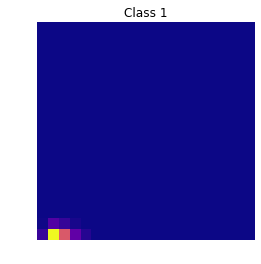

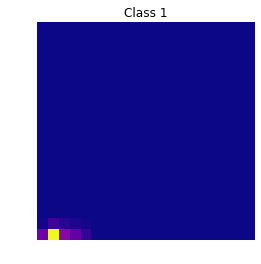

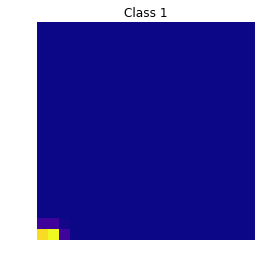

In [5]:
ns = 3
g = 1.0
rnd.seed(1)
for i in range(ns):
    t = pim_df.loc[pim_df.gest == g].sample()
    t = t.values[:, :-2].reshape(-1, px)
    pim.show(t)
    plt.title("Class 1")
    plt.show()

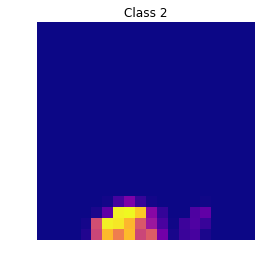

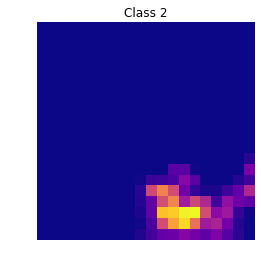

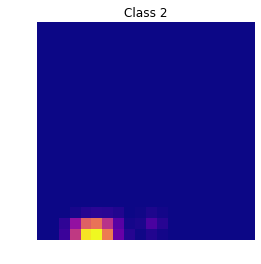

In [6]:
ns = 3
g = 2.0
rnd.seed(1)
for i in range(ns):
    t = pim_df.loc[pim_df.gest == g].sample()
    t = t.values[:, :-2].reshape(-1, px)
    pim.show(t)
    plt.title("Class 2")
    plt.show()

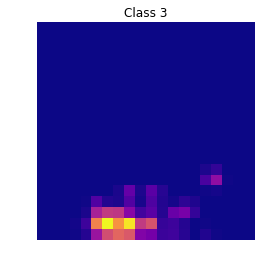

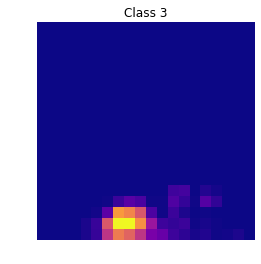

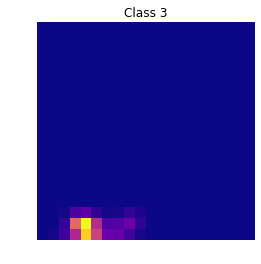

In [7]:
ns = 3
g = 3.0
rnd.seed(1)
for i in range(ns):
    t = pim_df.loc[pim_df.gest == g].sample()
    t = t.values[:, :-2].reshape(-1, px)
    pim.show(t)
    plt.title("Class 3")
    plt.show()

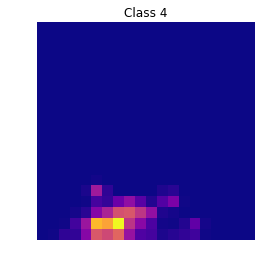

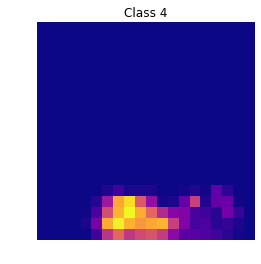

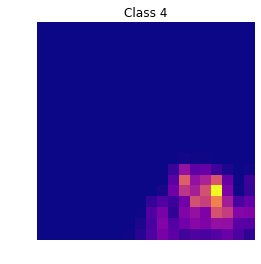

In [8]:
ns = 3
g = 4.0
rnd.seed(1)
for i in range(ns):
    t = pim_df.loc[pim_df.gest == g].sample()
    t = t.values[:, :-2].reshape(-1, px)
    pim.show(t)
    plt.title("Class 4")
    plt.show()

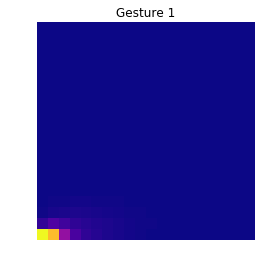

In [9]:
CF1 = np.sum(pim_df.loc[pim_df.gest==1].values[:, :-2], axis=0)
CF1 = CF1 / CF1.sum()
CF1 = CF1.reshape(-1, px)

pim.show(CF1)
plt.title("Gesture 1")
plt.savefig("./figures/pres_figs/norm_sum_g1.png")

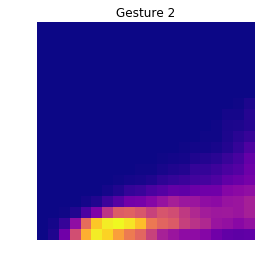

In [10]:
CF2 = np.sum(pim_df.loc[pim_df.gest==2].values[:, :-2], axis=0)
CF2 = CF2 / CF2.sum()
CF2 = CF2.reshape(-1, px)

pim.show(CF2)
plt.title("Gesture 2")
plt.savefig("./figures/pres_figs/norm_sum_g2.png")

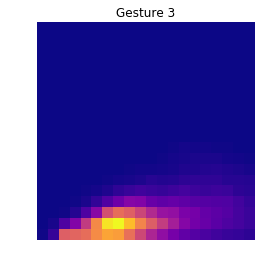

In [11]:
CF3 = np.sum(pim_df.loc[pim_df.gest==3].values[:, :-2], axis=0)
CF3 = CF3 / CF3.sum()
CF3 = CF3.reshape(-1, px)

pim.show(CF3)
plt.title("Gesture 3")
plt.savefig("./figures/pres_figs/norm_sum_g3.png")

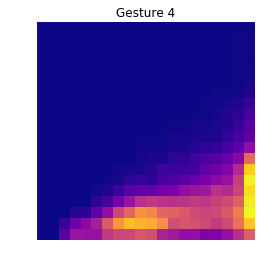

In [12]:
CF4 = np.sum(pim_df.loc[pim_df.gest==4].values[:, :-2], axis=0)
CF4 = CF4 / CF4.sum()
CF4 = CF4.reshape(-1, px)

pim.show(CF4)
plt.title("Gesture 4")
plt.savefig("./figures/pres_figs/norm_sum_g4.png")

---

### Classification w/ just dot product of prototypical pim

In [13]:
typic_1 = CF1.reshape(-1, 1)
typic_2 = CF2.reshape(-1, 1)
typic_3 = CF3.reshape(-1, 1)
typic_4 = CF4.reshape(-1, 1)

In [14]:
nv, c = pim_df.shape
acc_df = np.zeros(shape=(nv, 5))
acc_df = pd.DataFrame(acc_df)
acc_df.columns = ["G1", "G2", "G3", "G4", "gest"]
acc_df.gest = pim_df.gest
for i in range(nv):
    acc_df.values[i, 0] = pim_df.values[i, :-2].reshape(1, -1).dot(typic_1)
    acc_df.values[i, 1] = pim_df.values[i, :-2].reshape(1, -1).dot(typic_2)
    acc_df.values[i, 2] = pim_df.values[i, :-2].reshape(1, -1).dot(typic_3)
    acc_df.values[i, 3] = pim_df.values[i, :-2].reshape(1, -1).dot(typic_4)
    acc_df.values[i, :-1] = acc_df.values[i, :-1] / acc_df.values[i, :-1].sum()
    acc_df.values[i, :-1] = np.where(acc_df.values[i, :-1] == acc_df.values[i, :-1].max(), 1, 0)

In [28]:
plcs = np.arange(1, 5).reshape(-1, 1)
acc = 0
for i in range(nv):
    if acc_df.values[i, :-1] @ plcs == acc_df.gest.iloc[i]:
        acc+=1
acc/nv

0.5711805555555556